In [21]:
# Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
from sklearn.datasets import make_blobs # from datasets module import make_blobs to make artificial blobs dataset.

In [23]:
# fetch X and y values from make blobs function
X,y = make_blobs(
                    n_samples=300, # The number of rows 
                    n_features=2, # The number of columns
                    centers = 3, # The number of centres = no of clusters
                    cluster_std = 2.5, # The standard deviation of the clusters 
                    shuffle = True # To shuffle the samples
)

In [24]:
X.shape,y.shape # the shape of the arrays

((300, 2), (300,))

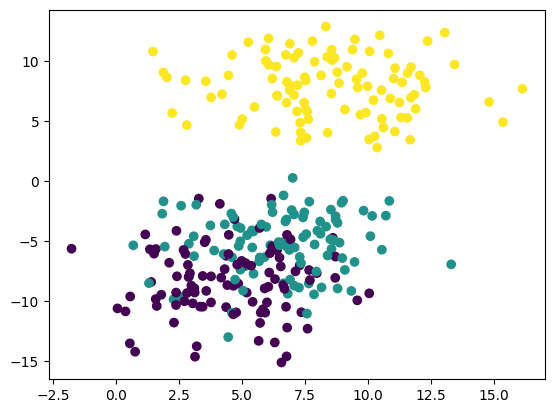

In [25]:
# Plot the columns of X in different dimensions and y(labels) as the color of the points.
plt.scatter(
    x = X[:,0], # The column X1
    y = X[:,1], # The column X2
    c = y # The labels
)
plt.show()

In [26]:
# Import AgglomerativeClustering from cluster module
from sklearn.cluster import AgglomerativeClustering 

In [27]:
# Instantiate the model
aglc = AgglomerativeClustering(
    linkage = 'ward', # We are using the wart method as I think it is best to use in thisb case.
    n_clusters = 3 # The number of clusters to form
)

In [28]:
y_pred = aglc.fit_predict(X) # predict the labels

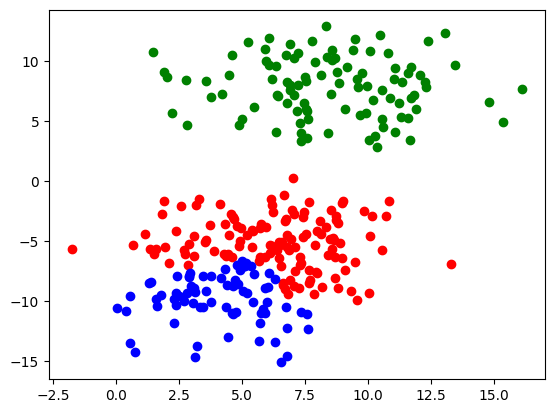

In [29]:
# The number of scatterplots here is equat=l to the centers and the cluster (just for visualization in the scenario).
plt.scatter(
    x = X[y_pred==0,0],
    y = X[y_pred==0,1],
    c = 'red'
)
plt.scatter(
    x = X[y_pred==1,0],
    y = X[y_pred==1,1],
    c = 'green'
)
plt.scatter(
    x = X[y_pred==2,0],
    y = X[y_pred==2,1],
    c = 'blue'
)
plt.show()

In [30]:
# For 3d we can use 3dplot and for futher dimensions we can use PCA.
# fig_3d = px.scatter_3d(  
#                 x = X[:,0],
#                 y = X[:,1],
#                 z = X[:,2],
#                 color = y_pred
# )
# fig_3d.show()

In [ ]:
# Now for evaluation of the model we are gonna use some of these metrics
from sklearn.metrics import silhouette_score,davies_bouldin_score # Import the metrics

In [32]:
silhouette_score(X,y_pred) # It measures "fit."

0.4351351634915011

In [33]:
davies_bouldin_score(X,y_pred) # It measures "separation."

0.8561149035737695

In [ ]:
import scipy.cluster.hierarchy as sch # Import this module to plot dendograms

In [ ]:
# Instantiate the linkage method to perform AgglomerativeHeirarchicalClustering on the X variable using sch.linkage.
Z = sch.linkage(
    X, # Our variable to predict clusters
    method = 'ward' # Same as before
)

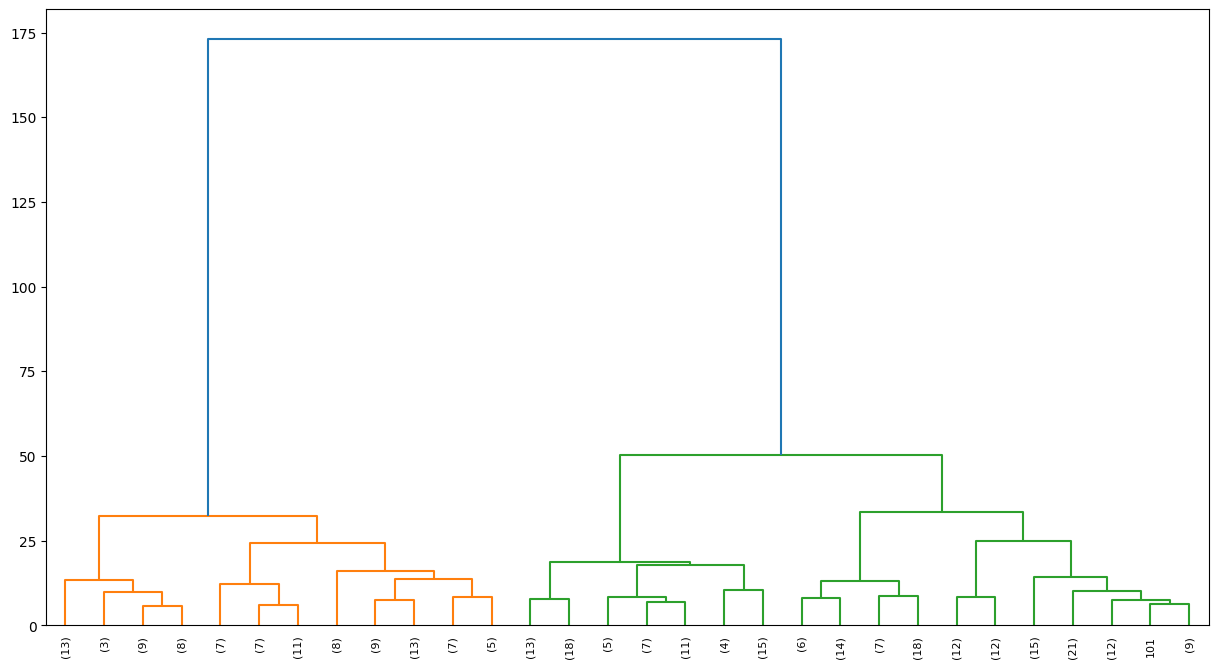

In [ ]:
# Plot the dendogram 
plt.figure(figsize=(15,8))
sch.dendrogram(
    Z, # The calculated linkage matrix for the dendorgam
    leaf_font_size=8, # The size of the leaf's font size at the bottom.
    leaf_rotation=90., # The rotation angle of the leaf
    truncate_mode = 'lastp' # If true trucates the tree from bottom and only return the tree from which true clustering starts.
)
plt.show()

Clusters : 2 		 Silhouette score 0.6655633447948635 		  Davies-Bouldin Index 0.47265489403516875


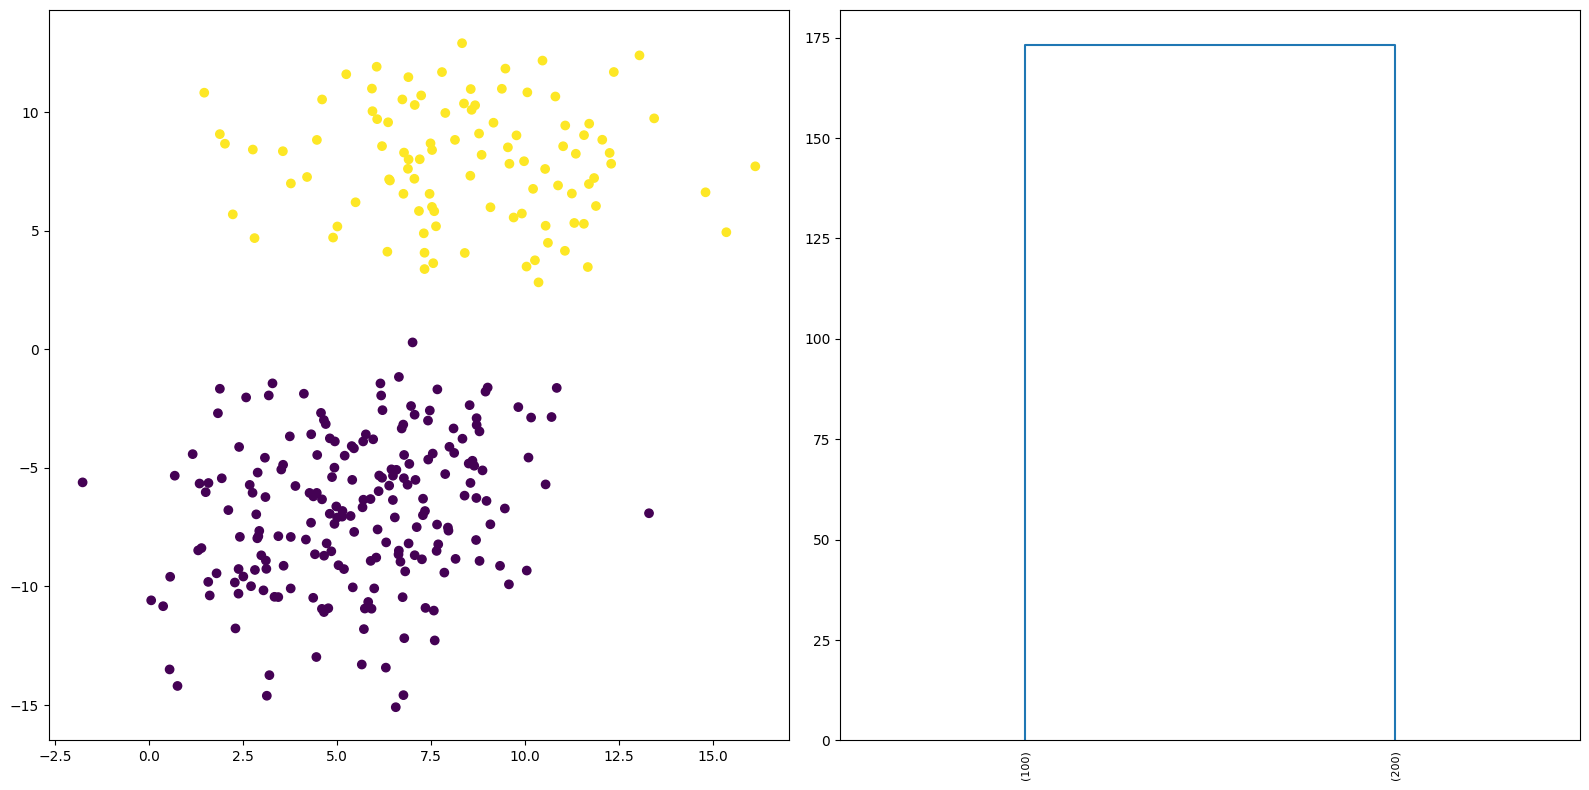

Clusters : 3 		 Silhouette score 0.4351351634915011 		  Davies-Bouldin Index 0.8561149035737695


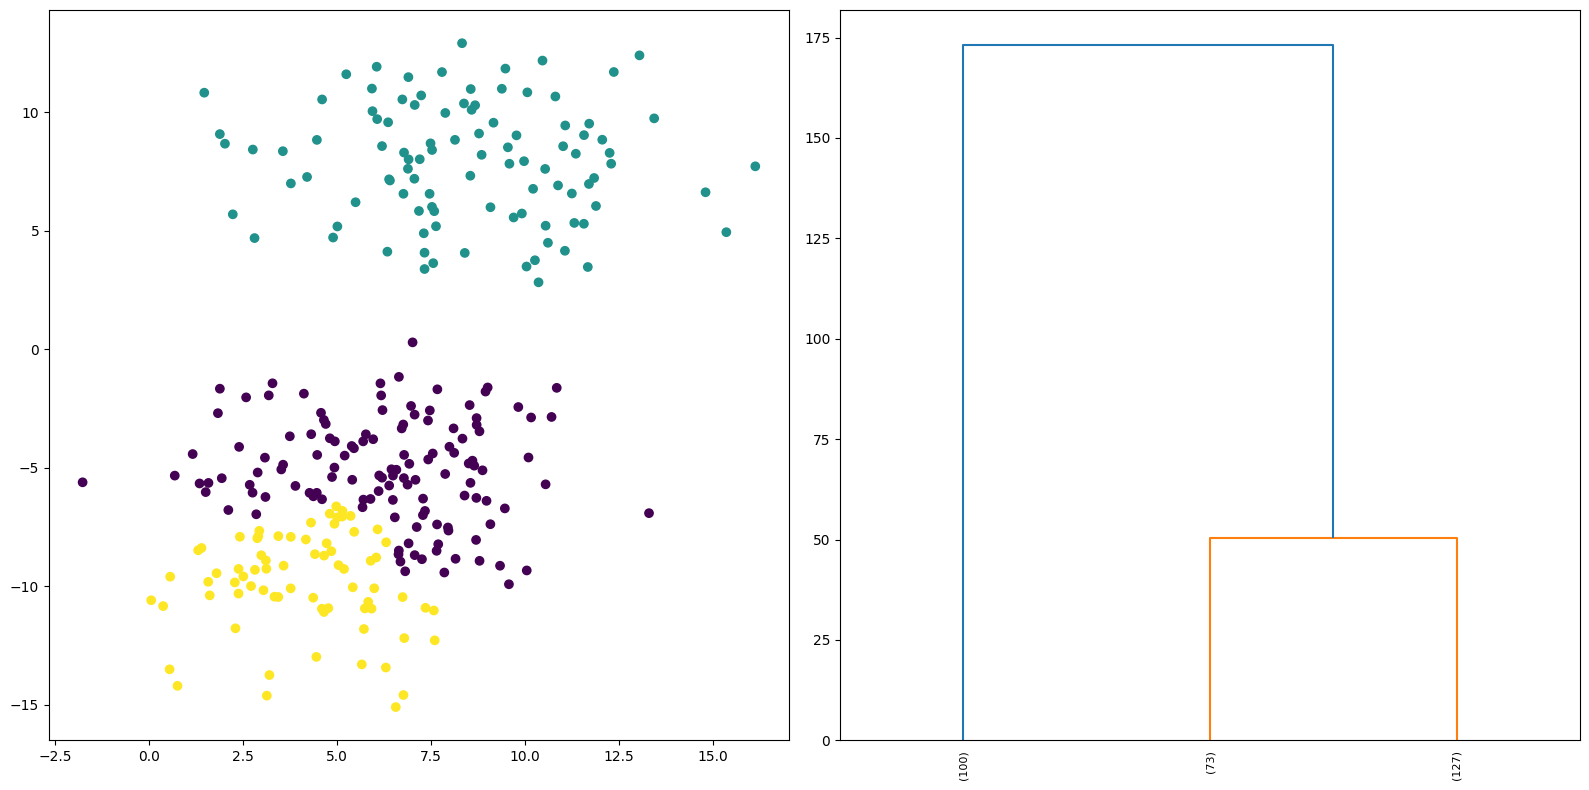

Clusters : 4 		 Silhouette score 0.4208531463535085 		  Davies-Bouldin Index 0.8366131287516003


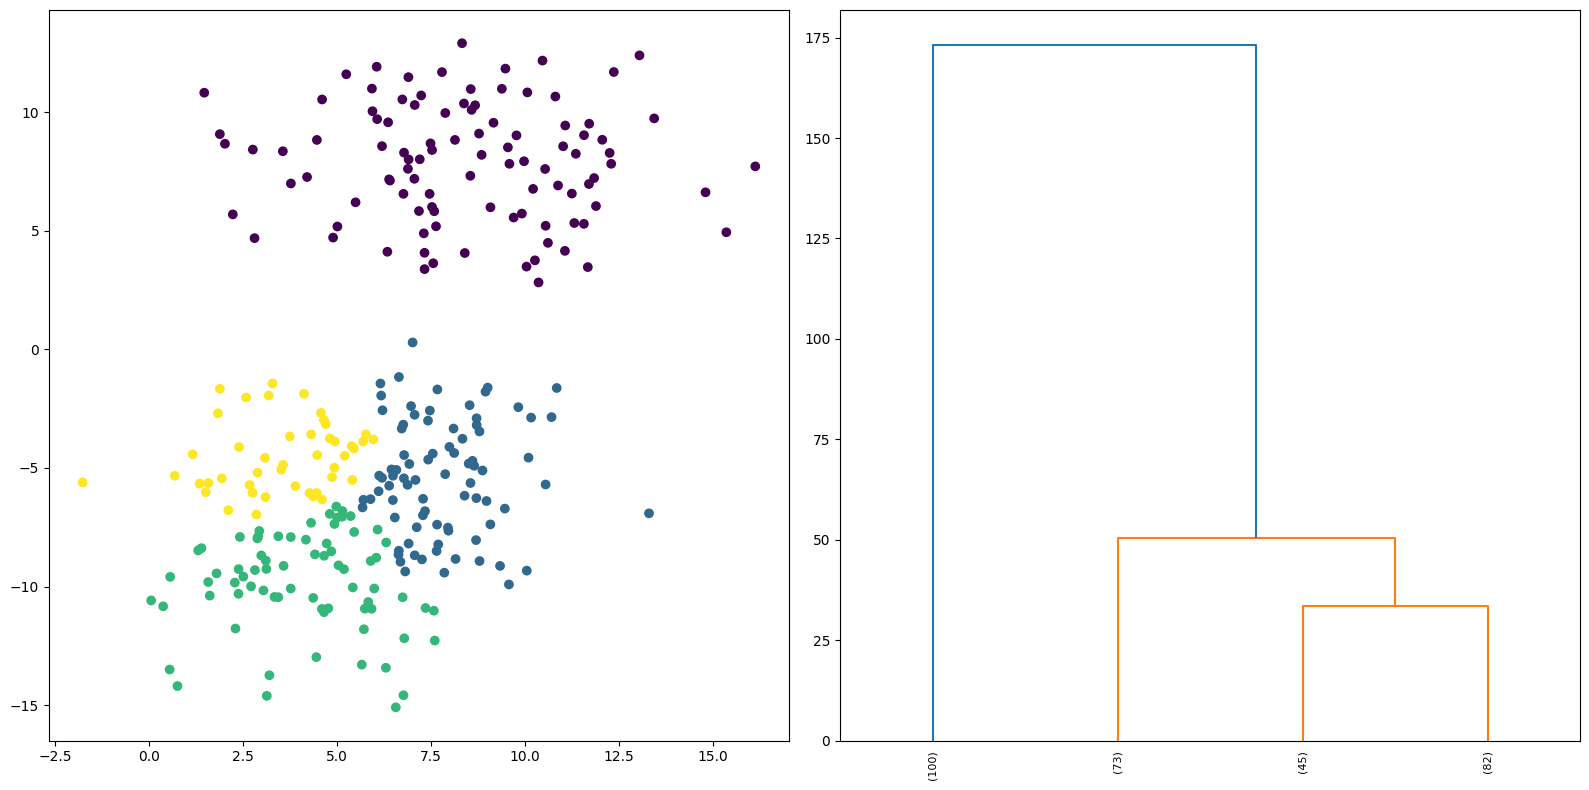

Clusters : 5 		 Silhouette score 0.3227341934722116 		  Davies-Bouldin Index 1.0073122150482832


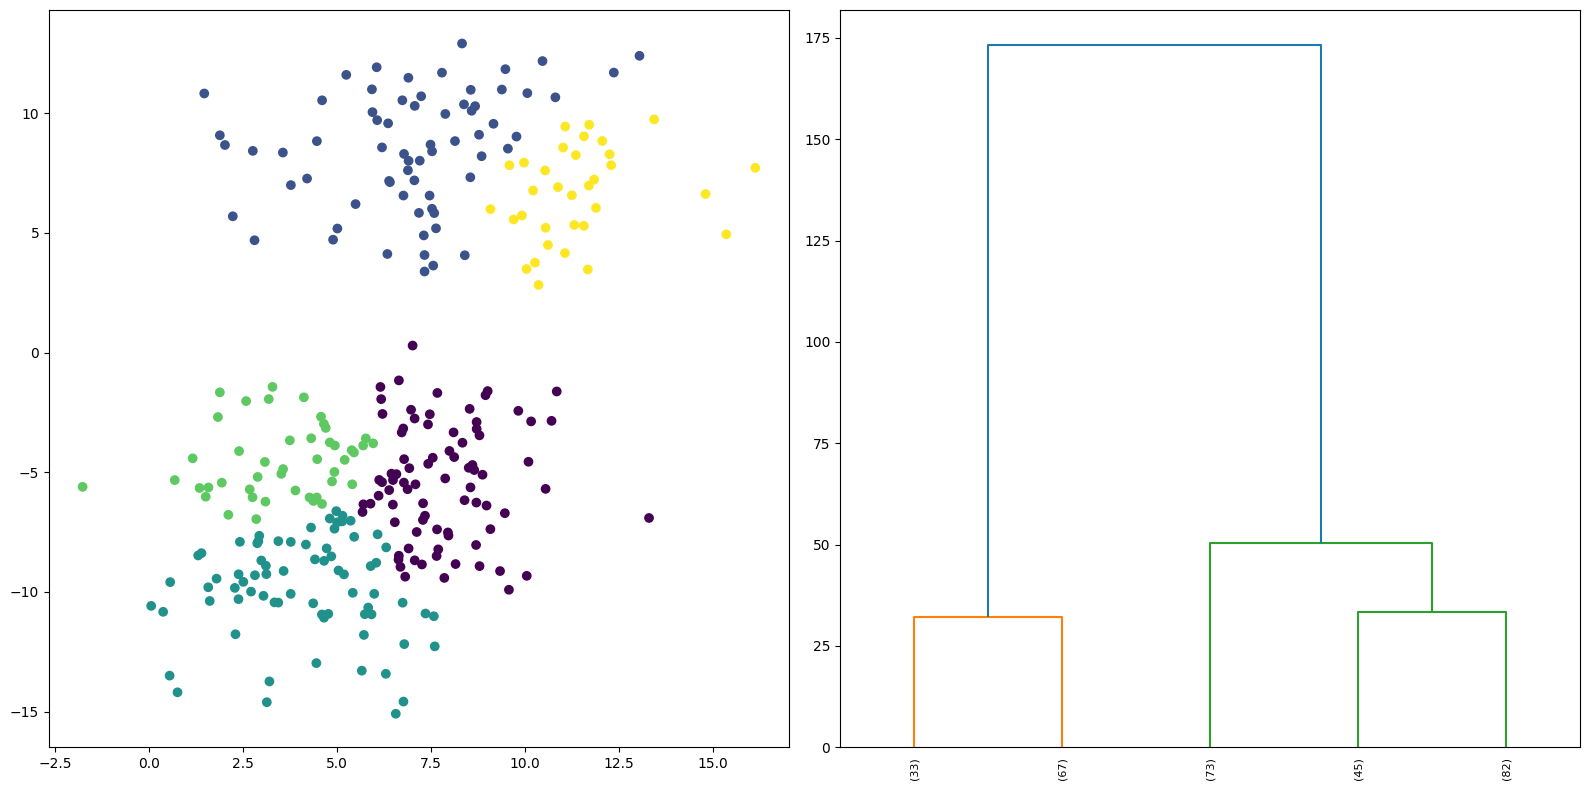

Clusters : 6 		 Silhouette score 0.3252197055067299 		  Davies-Bouldin Index 0.9350935893878863


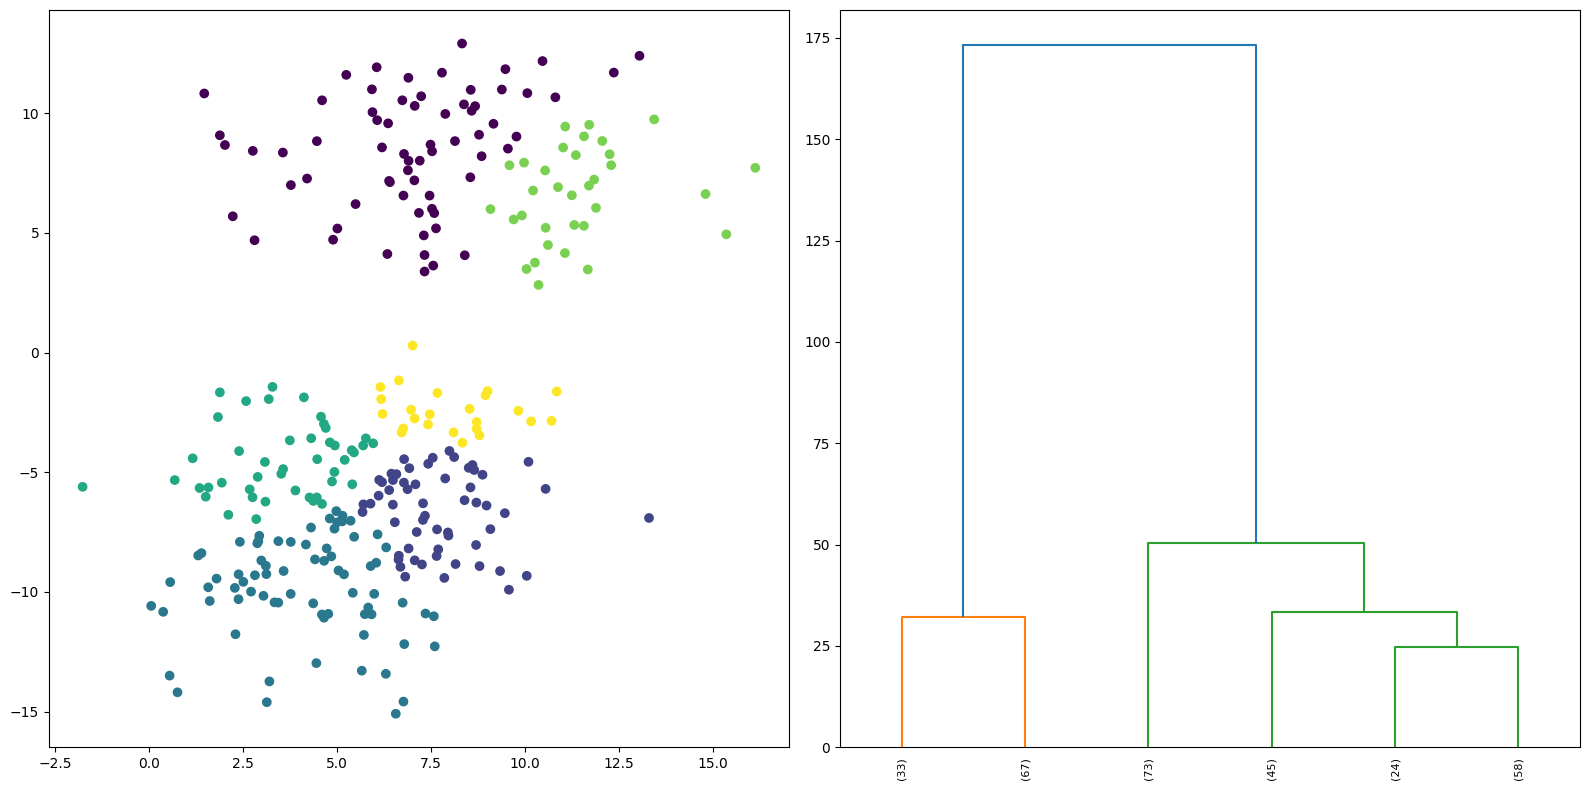

Clusters : 7 		 Silhouette score 0.3266351879658091 		  Davies-Bouldin Index 0.9228266531586716


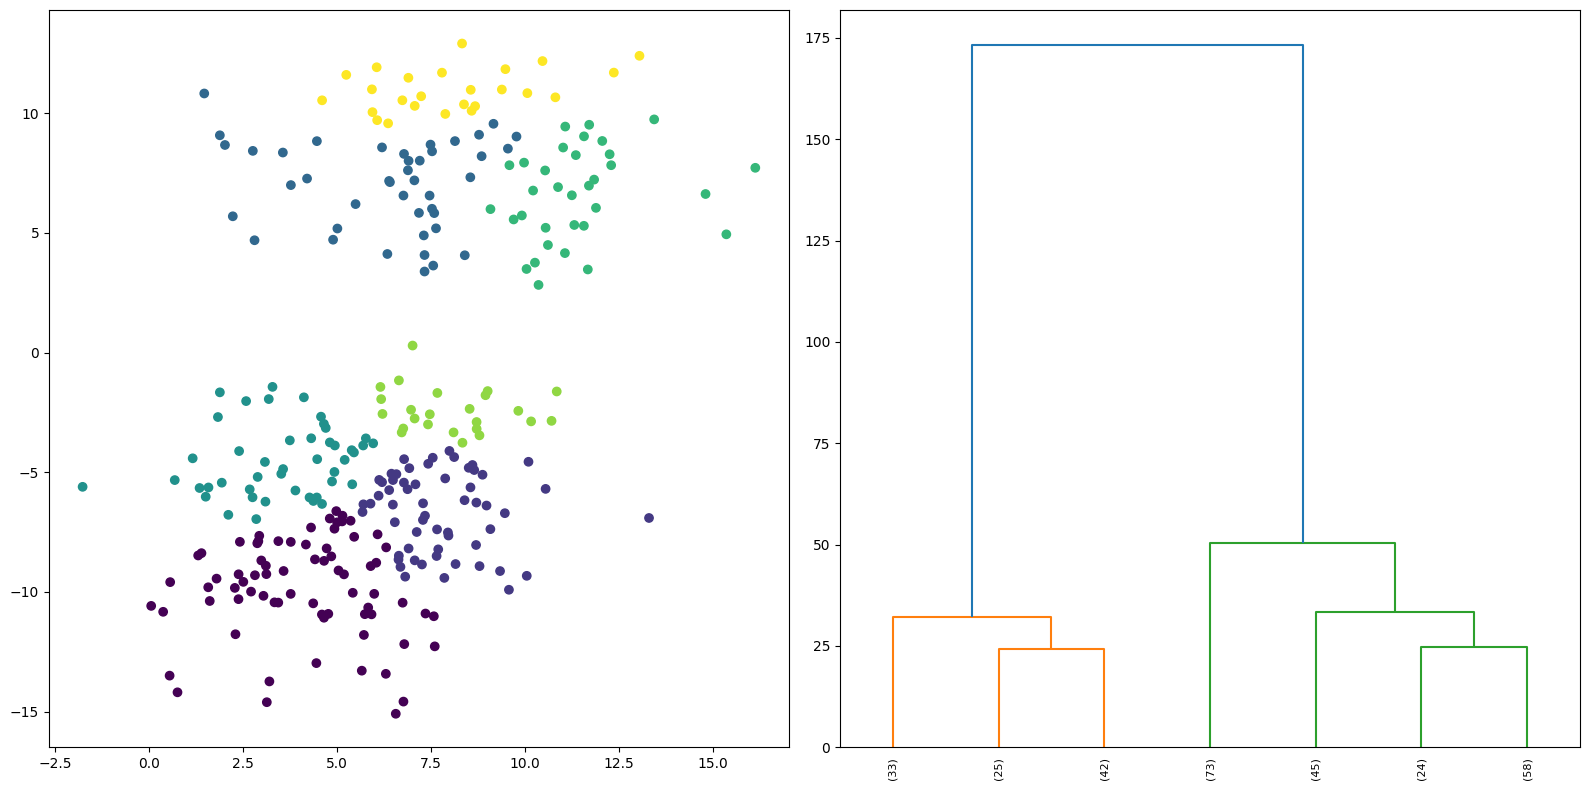

Clusters : 8 		 Silhouette score 0.2810148577268068 		  Davies-Bouldin Index 0.9992528321958692


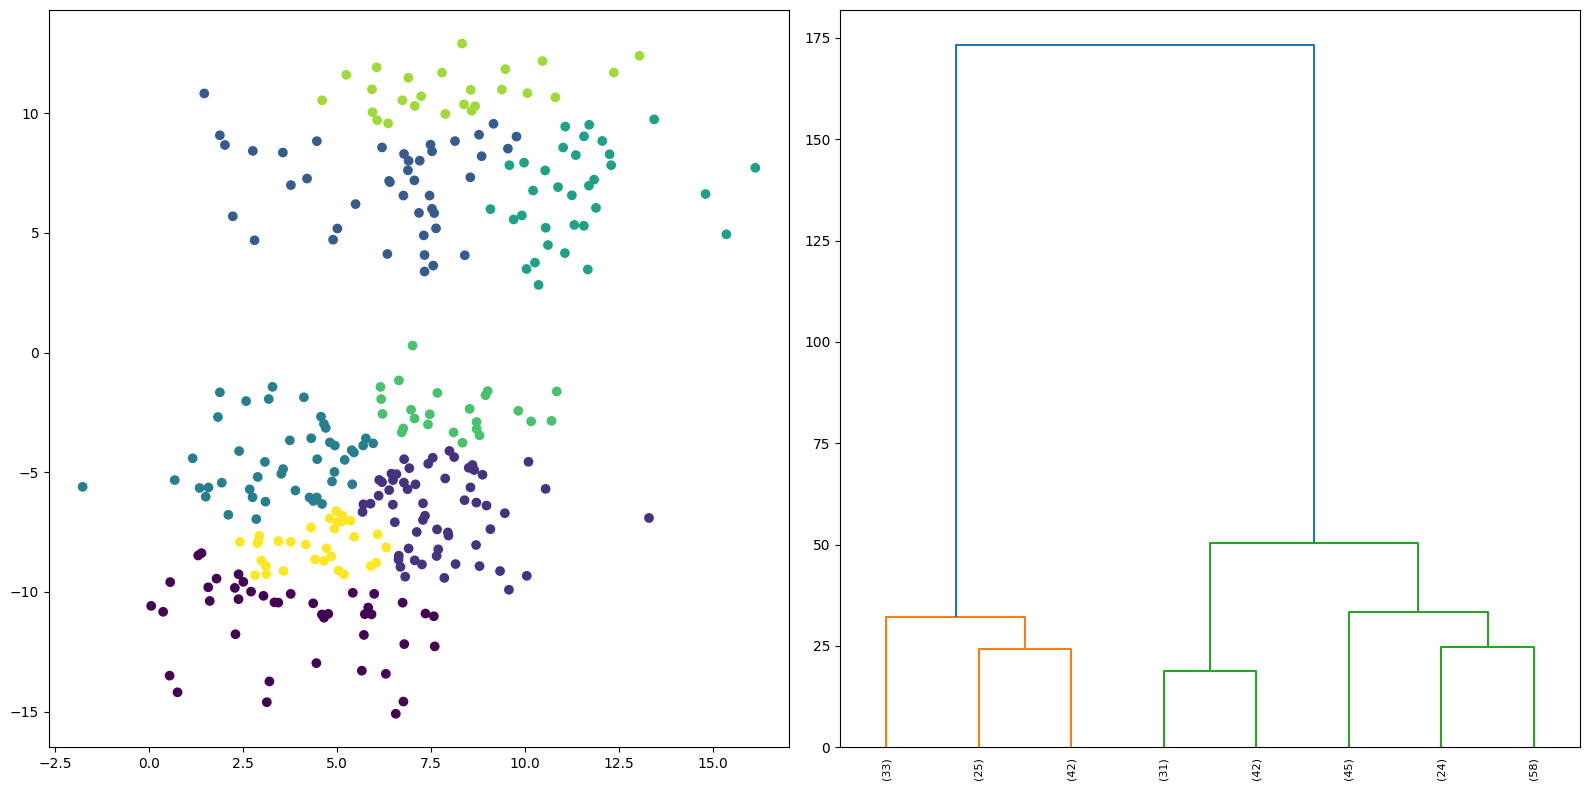

Clusters : 9 		 Silhouette score 0.30487208934427873 		  Davies-Bouldin Index 0.9186815619058072


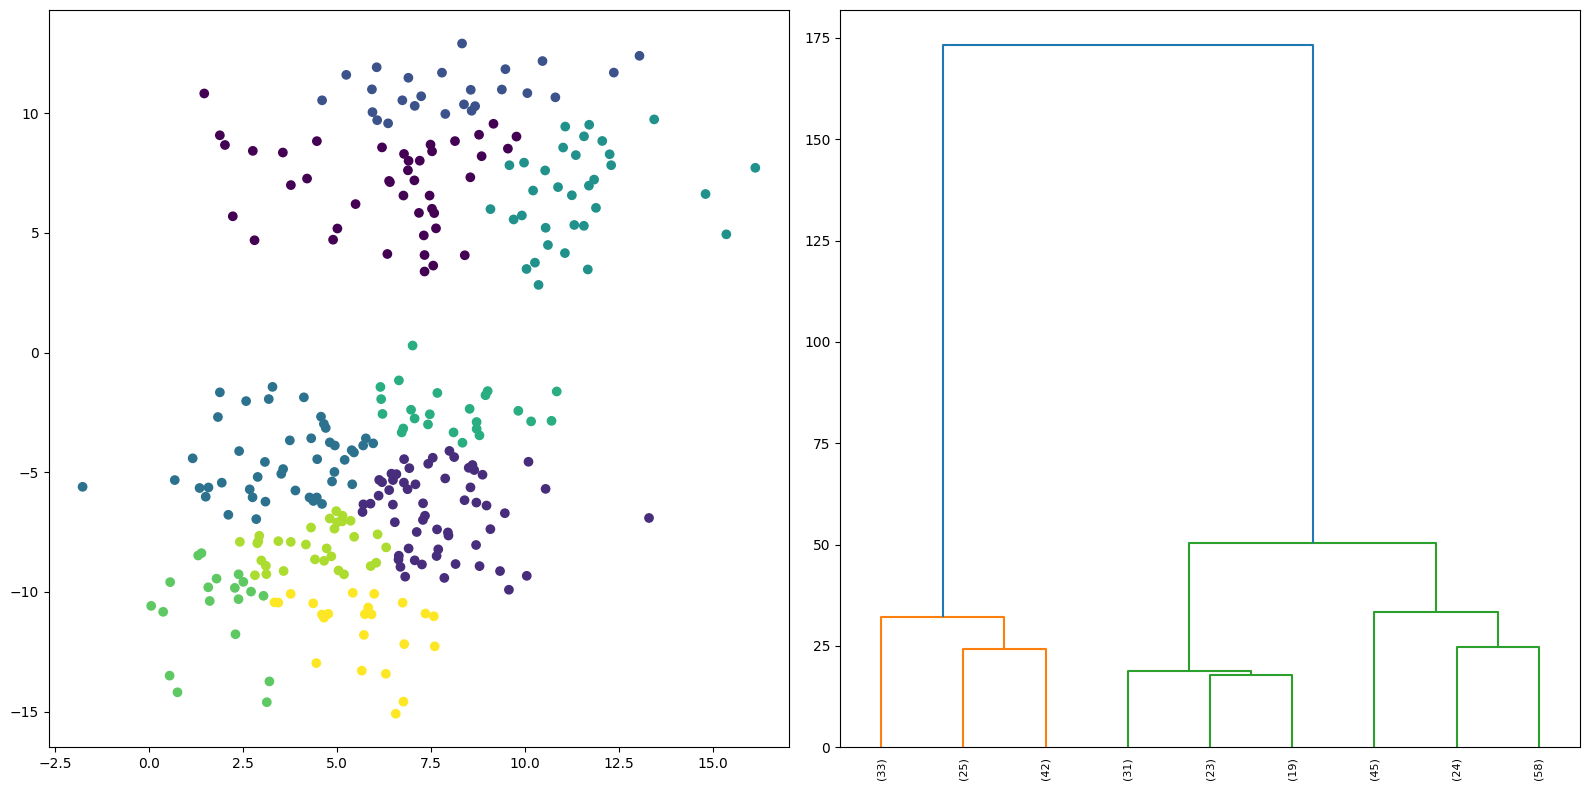

Clusters : 10 		 Silhouette score 0.30500265117166153 		  Davies-Bouldin Index 0.8925929492259147


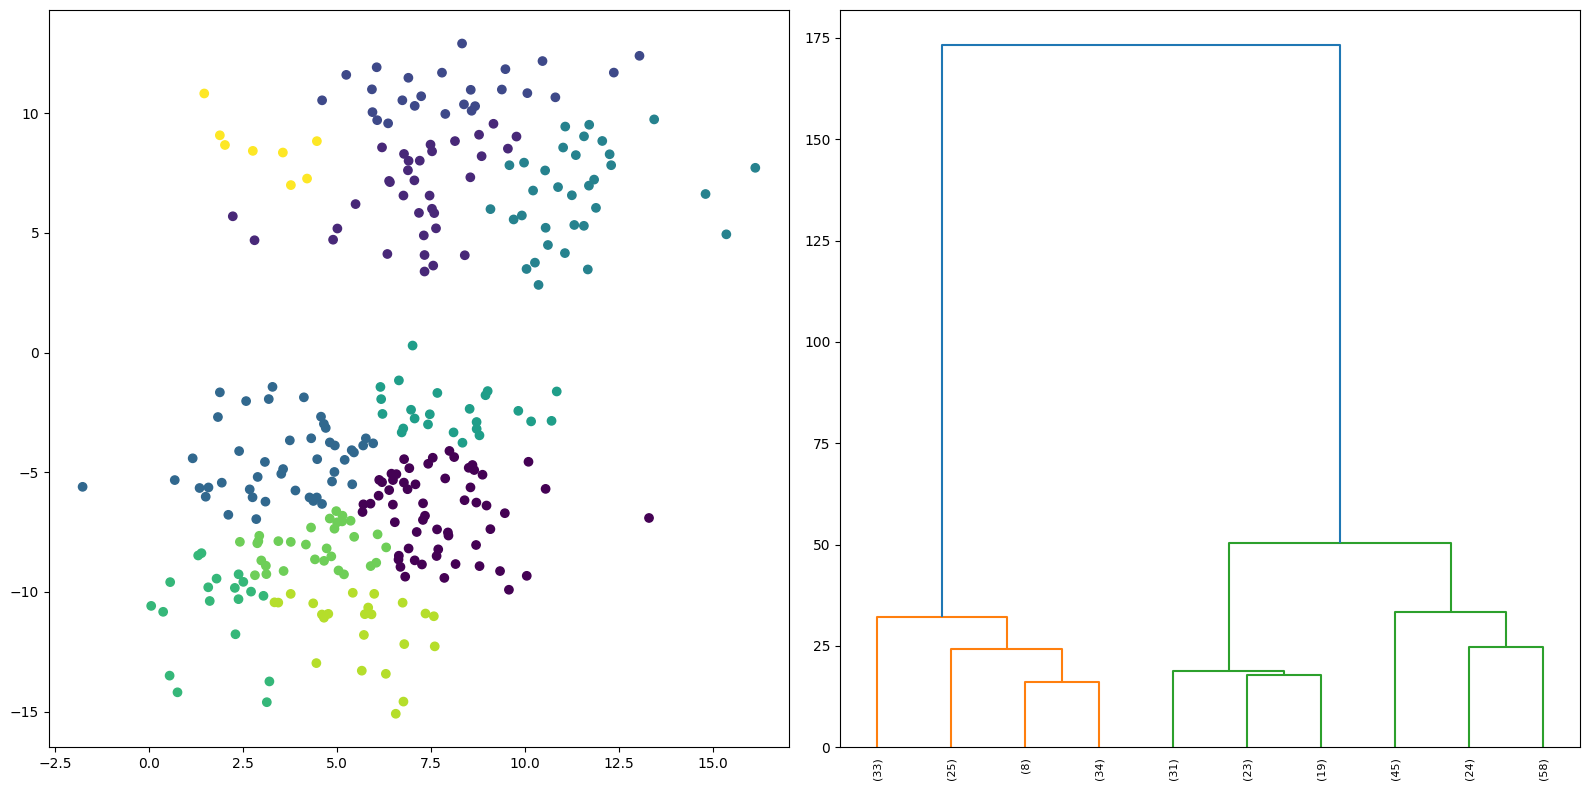

In [49]:
# A simple for loop to visualize how the no of cluster affects differnt values .
for k in range(2,11):

    aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = k
    )
    
    y_pred = aglc.fit_predict(X)

    print(f'Clusters : {k} \t\t Silhouette score {silhouette_score(X,y_pred)} \t\t  Davies-Bouldin Index {davies_bouldin_score(X,y_pred)}')
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

    ax1.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    )


    Z = sch.linkage(
        X,
        method = 'ward'
    )

    dend = sch.dendrogram(
        Z,
        leaf_font_size = 8,
        leaf_rotation = 90,
        truncate_mode='lastp',
        p=k,  # Show only the last 'k' merged clusters for clarity
        ax=ax2
    )

    plt.tight_layout()
    plt.show()
